## Analysis of blood sugar data

Install necessary dependencies

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('Ivan_data.csv', parse_dates=[0])
df = df.iloc[9849:118339, :]
date_time = df['Date-time']
df.set_index('Date-time', inplace=True)
display(df)


,Blood-sugar
Date-time,
2019-01-01 00:12:00,267
2019-01-01 00:27:00,289
2019-01-01 00:42:00,299
2019-01-01 00:57:00,302
2019-01-01 01:12:00,302
...,...
2021-12-31 22:44:00,79
2021-12-31 22:59:00,108
2021-12-31 23:14:00,128


Plot of all interpolated data

<AxesSubplot:xlabel='Date-time'>

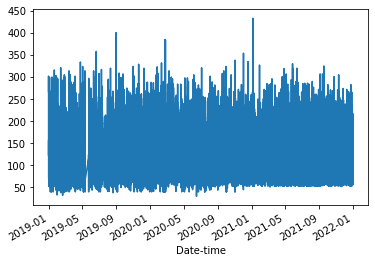

In [26]:
df['Blood-sugar'].plot()

Last week of data

<AxesSubplot:xlabel='Date-time'>

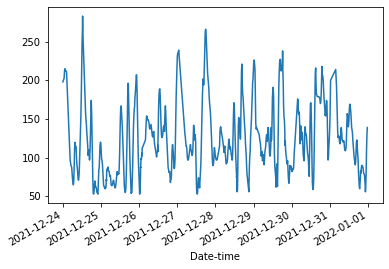

In [46]:
df['Blood-sugar'][-771:-1].plot()

Last full day of data

<AxesSubplot:xlabel='Date-time'>

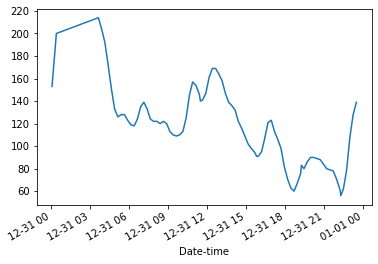

In [31]:
df['Blood-sugar'][-87:-1].plot()

In [47]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Blood-sugar,108490.0,134.245792,50.170857,30.0,96.0,129.0,166.0,433.0


### Fast Fourier Transform

Determines which frequencies are important

In [48]:
fft = tf.signal.rfft(df['Blood-sugar'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['Blood-sugar'])
hours_per_week = 24*7
weeks_per_dataset = n_samples_h/(hours_per_week)

f_per_year = f_per_dataset/weeks_per_dataset

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-05 19:14:42.896420: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-05 19:14:42.897197: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


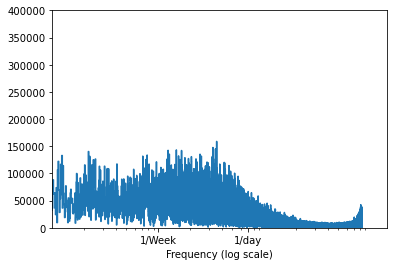

In [49]:
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)

plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 7], labels=['1/Week', '1/day'])
plt.xlabel('Frequency (log scale)')
plt.show()
